In [4]:
import numpy as np
import pandas as pd


In [5]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [6]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
frames=[train_df,test_df]
data=pd.concat(frames,sort=False)
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [10]:
train_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
data['Product_Category_2']

0          NaN
1          6.0
2          NaN
3         14.0
4          NaN
          ... 
233594     NaN
233595     8.0
233596     5.0
233597    16.0
233598     5.0
Name: Product_Category_2, Length: 783667, dtype: float64

In [12]:
test_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [13]:
train_df.fillna(0,inplace=True)
test_df.fillna(0,inplace=True)

In [14]:
train_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [15]:
test_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

# Data Visualization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

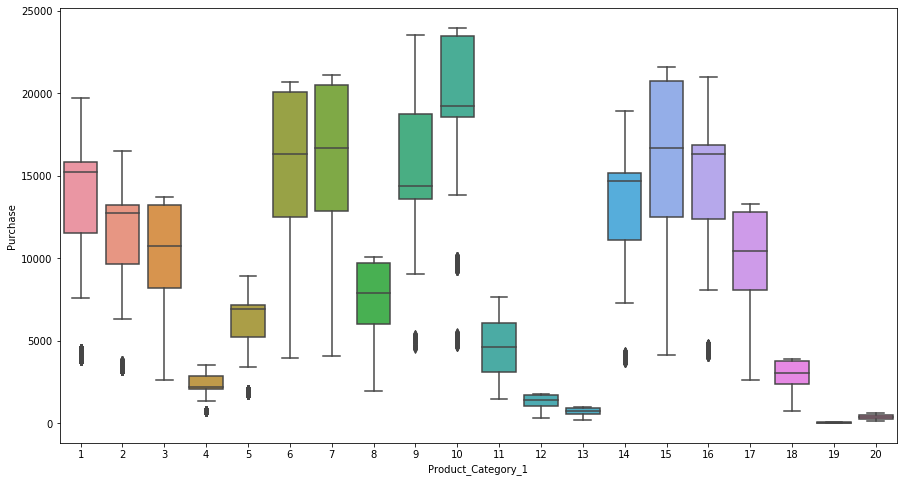

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(train_df['Product_Category_1'],train_df['Purchase'])

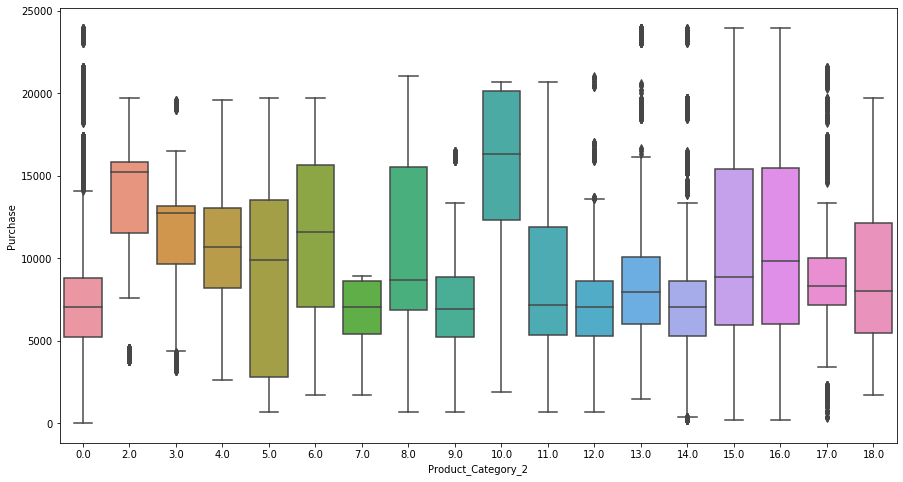

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(train_df['Product_Category_2'],train_df['Purchase'])

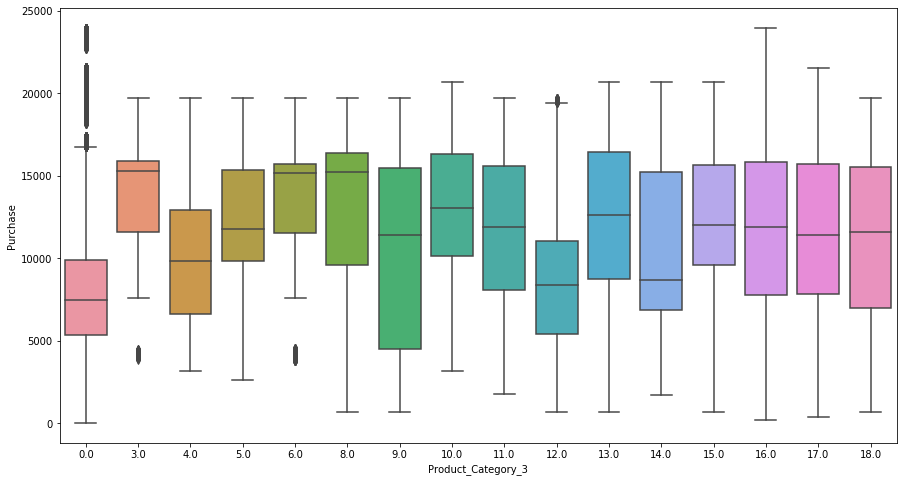

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(train_df['Product_Category_3'],train_df['Purchase'])

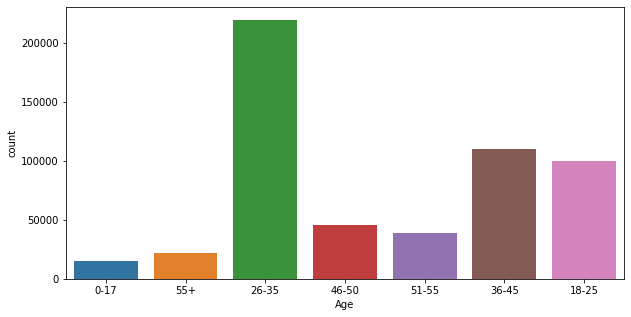

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(train_df['Age'])

Most of the buyers lie in the age group 26-35

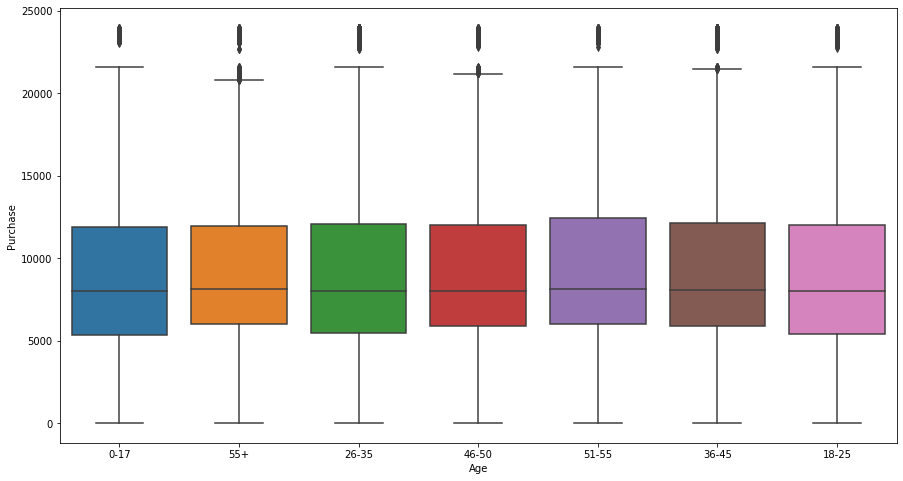

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(train_df['Age'],train_df['Purchase'])

Age does not highly impact the purchasing power of the user.

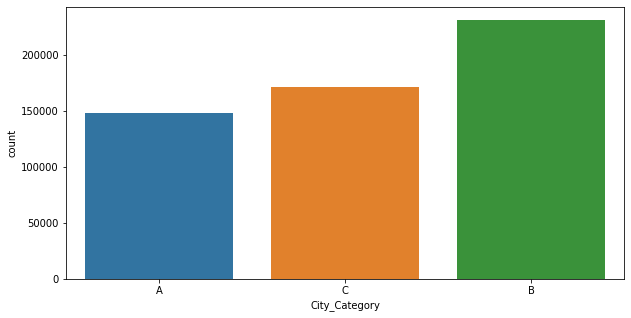

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(train_df['City_Category'])

Most of the buyers are from city B

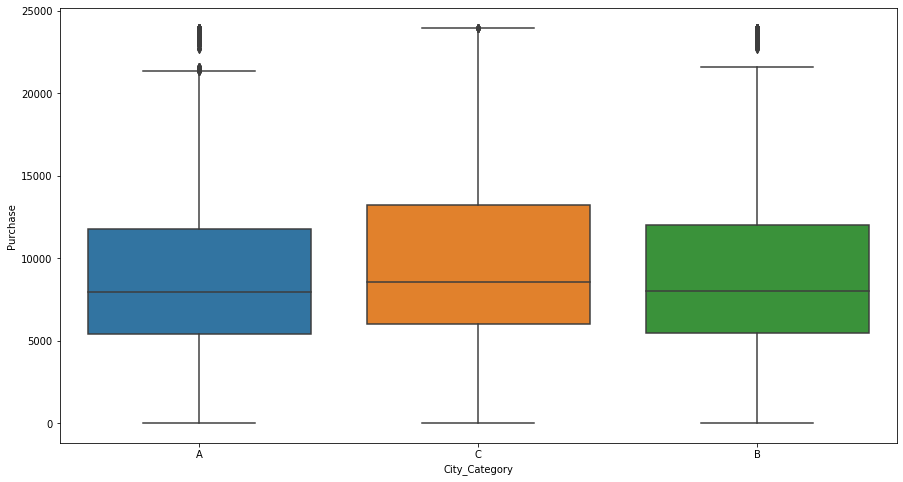

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(train_df['City_Category'],train_df['Purchase'])

So, purchasing power of users of city C is highest followed by B and A

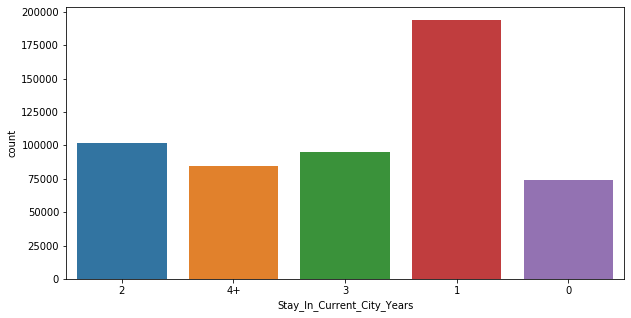

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(train_df['Stay_In_Current_City_Years'])

People who are new to the city tend to purchase more.

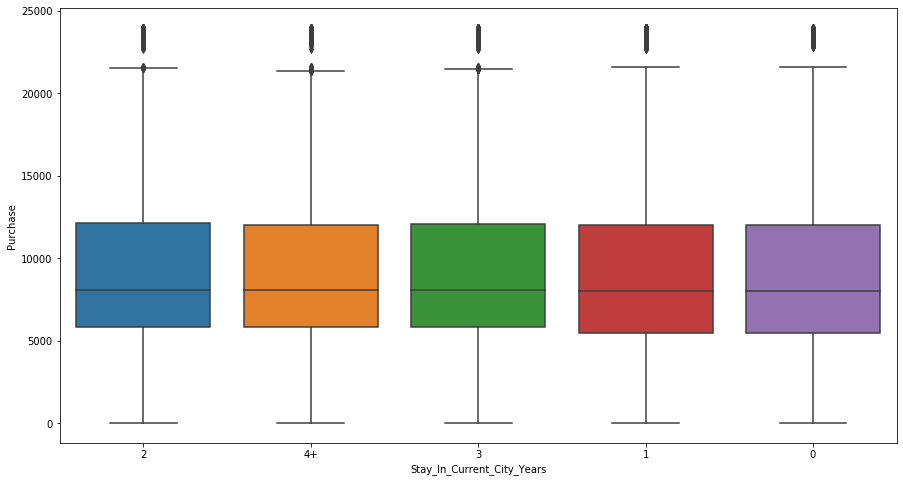

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(train_df['Stay_In_Current_City_Years'],train_df['Purchase'])

Purchasing power does not depend much on years of stay in the city.

In [26]:
train_df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00167342       1
P00062442       1
P00224642       1
P00160742       1
P00234942       1
Name: Product_ID, Length: 3631, dtype: int64

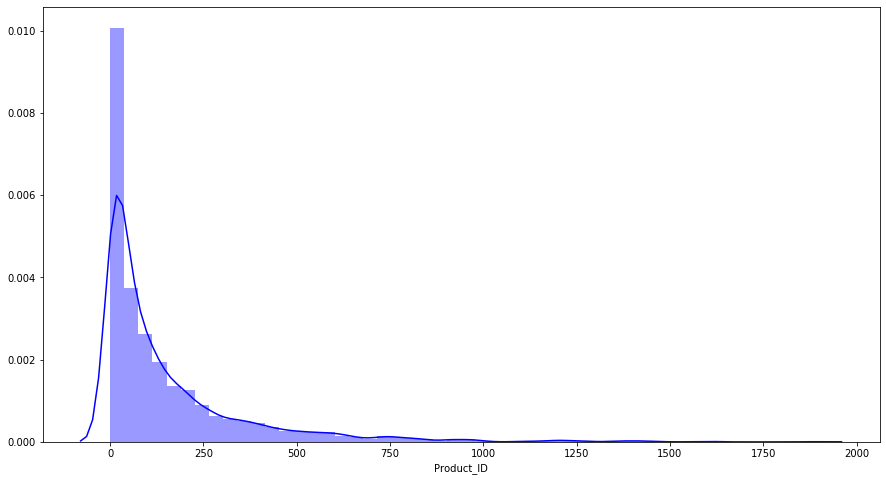

In [27]:
plt.figure(figsize=(15,8))
sns.distplot(train_df['Product_ID'].value_counts(),color='blue')

In [28]:
def label_encoding(df):
    df['Age']=df['Age'].replace('0-17',17)
    df['Age']=df['Age'].replace('18-25',25)
    df['Age']=df['Age'].replace('26-35',35)
    df['Age']=df['Age'].replace('36-45',45)
    df['Age']=df['Age'].replace('46-50',50)
    df['Age']=df['Age'].replace('51-55',55)
    df['Age']=df['Age'].replace('55+',60)
    df['Gender']=df['Gender'].replace('F',0)
    df['Gender']=df['Gender'].replace('M',1)
    df['City_Category']=df['City_Category'].replace('A',0)
    df['City_Category']=df['City_Category'].replace('B',1)
    df['City_Category']=df['City_Category'].replace('C',2)
    df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+',4)
    return df

In [29]:
train_df=label_encoding(train_df)
test_df=label_encoding(test_df)

In [30]:
from sklearn.feature_selection import RFE

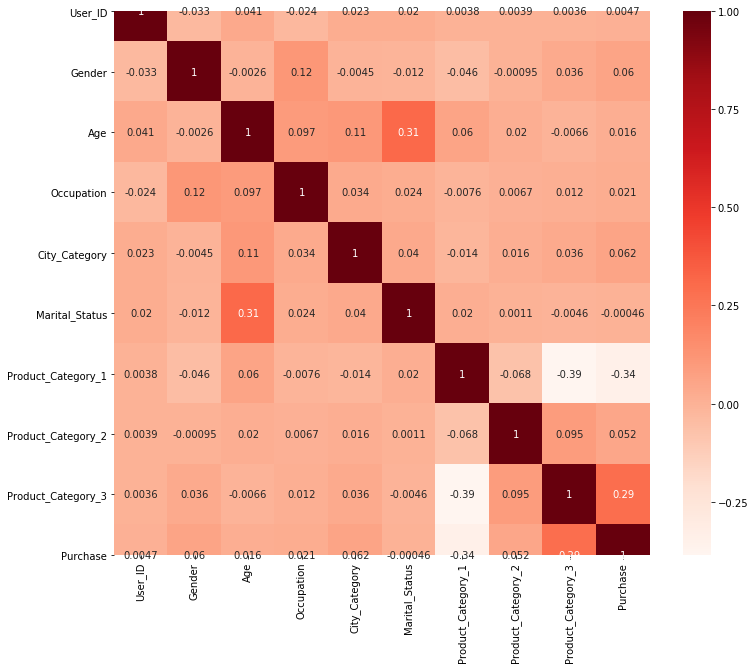

In [31]:
plt.figure(figsize=(12,10))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [32]:
cor_target = abs(cor["Purchase"])

In [33]:
relevant_features = cor_target[cor_target>0.05]
relevant_features

Gender                0.060346
City_Category         0.061914
Product_Category_1    0.343703
Product_Category_2    0.052288
Product_Category_3    0.288501
Purchase              1.000000
Name: Purchase, dtype: float64

In [34]:
data=train_df.drop(['Age','Occupation','Marital_Status'],axis=1)
data

,User_ID,Product_ID,Gender,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,2,3,0.0,0.0,8370
1,1000001,P00248942,0,0,2,1,6.0,14.0,15200
2,1000001,P00087842,0,0,2,12,0.0,0.0,1422
3,1000001,P00085442,0,0,2,12,14.0,0.0,1057
4,1000002,P00285442,1,2,4,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,1,1,20,0.0,0.0,368
550064,1006035,P00375436,0,2,3,20,0.0,0.0,371
550065,1006036,P00375436,0,1,4,20,0.0,0.0,137
550066,1006038,P00375436,0,2,2,20,0.0,0.0,365


In [35]:
# split data into X and y
X = data.iloc[:,0:8]
Y = data.iloc[:,8]
X

,User_ID,Product_ID,Gender,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,0,0,2,3,0.0,0.0
1,1000001,P00248942,0,0,2,1,6.0,14.0
2,1000001,P00087842,0,0,2,12,0.0,0.0
3,1000001,P00085442,0,0,2,12,14.0,0.0
4,1000002,P00285442,1,2,4,8,0.0,0.0
...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,1,1,20,0.0,0.0
550064,1006035,P00375436,0,2,3,20,0.0,0.0
550065,1006036,P00375436,0,1,4,20,0.0,0.0
550066,1006038,P00375436,0,2,2,20,0.0,0.0


In [36]:
from sklearn import preprocessing
X['Product_ID'] = X['Product_ID'].map(lambda x: x.lstrip('P'))
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.75263944, -1.02877366, -1.74651251, -1.37151602,  0.10980142,
        -0.61080871, -1.08365403, -0.61464112],
       [-1.75263944,  0.72213886, -1.74651251, -1.37151602,  0.10980142,
        -1.11891197, -0.11832323,  1.62510562],
       [-1.75263944, -0.84579893, -1.74651251, -1.37151602,  0.10980142,
         1.67565594, -1.08365403, -0.61464112],
       [-1.75263944, -0.8691574 , -1.74651251, -1.37151602,  0.10980142,
         1.67565594,  1.16878452, -0.61464112],
       [-1.7520606 ,  1.07738237,  0.57256962,  1.25933601,  1.66086068,
         0.65944943, -1.08365403, -0.61464112]])

In [41]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=test_size)

In [43]:
xgb=XGBRegressor(n_estimators=500,learning_rate=0.2,gamma=0,min_child_weight=10,
                           subsample=0.8,colsample_bytree=1,max_depth=7)

In [44]:
XGB_model=xgb.fit(X_train,y_train)

C:\Users\dell\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:30:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [45]:
pred=XGB_model.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,pred))

2542.6702966345147